### Problem Statement:

#### What?
##### The task is to predict price for the houses present in King County, Washington, US. using the most efficient model. We have a training and testing dataset that includes details of homes sold between May 2014 and May 2015. The column description is as below: 

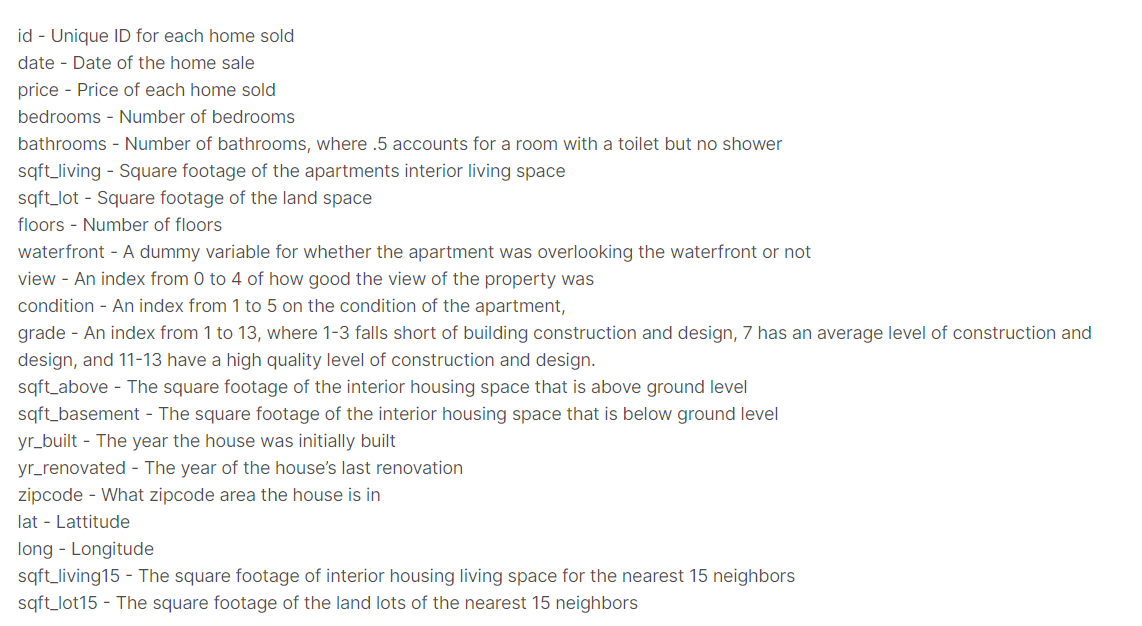

#### Why?
##### This model will help us to evaluate the present price of a house located in KC based on its features. Also creating a model to predict the house price will help those who want to sell their homes to transact a good deal. 

#### How?
##### * Step-1: Formulate question/hypothesis
##### * Step-2: Exploratory Data Analysis (Using previously created function to plot the necessary graphs)
##### * Step-3: Finding predictors that help in fitting the most accurate linear regression model
##### * Step-4: Calculating the CV-score for the considered predictors
##### * Step-5: Experimenting with feature transformations and generations techniques to find if this improves the performance of the model
##### * Step-6: Use forward selection and backward elimination method to select an appropriate model
##### * Step-7: Using decision tree to fit all the transformed/feature-generated data by using the tuned hyper-parameters.
##### * Step-8: Testing the best performing model using the test data and reporting the results

#### Expected Output:
##### R2, RMSE of all the created models using training data. Using the lowest RMSE value(highest R2) to select the final model and fitting the same on test data. RMSE and MAE of the predicted data is calculated for final inferences.

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import random
import seaborn as sns
#from functions import graphs_r1 - previously created graph function
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")

In [3]:
house = pd.read_csv(r'kc_house_train_data.csv')

In [4]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [3]:
house.shape                  #it has 9761 rows and 21 columns

(9761, 21)

In [4]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [5]:
house.describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


In [6]:
house.isnull().sum()         #no null values in dataset

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
house.dtypes 

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
house.nunique()

id               9720
date              357
price            2533
bedrooms           13
bathrooms          28
sqft_living       730
sqft_lot         5581
floors              6
waterfront          2
view                5
condition           5
grade              11
sqft_above        665
sqft_basement     251
yr_built          116
yr_renovated       65
zipcode            70
lat              4186
long              666
sqft_living15     588
sqft_lot15       5147
dtype: int64

#### **Target variable - Price**
#### **Categorical predictors** - Date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
#### Total categorical predictors -**13**
#### **Numerical predictors** - sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
#### Total numerical predictors - **6**

# 1.Questions


1. Id is similar to Serial No and is not required to fit the model
2. Does minor change in latitiude and longitude affect the house price
3. Is the presence of basement affecting the house price
4. Is Condition inversely proportional to the house price
5. Does the house price depend on what year it was built and the year it was renovated(if any)
6. Does the house price really depend on the neighbouring house's living area?
7. Does the absence of complete bedrooms & bathrooms affect the house price?
8. There are 6 zero entries in bedroom column and 4 zero entries in bathroom column. Are they missing values?
9. One house has 33 bedrooms and 1.75 bathroom. Anamoly?
10. Is the presence of half floors affecting the house prices?
12. Change the date format present in the dataset

# 2.EDA

In [18]:
graphs_r1
graphs_r1(house,directory=r'D:\DS\Python\Praxis\IML\End Term\Graphs') #previously created graph function

NameError: name 'graphs_r1' is not defined

In [10]:
df = house                   #making a copy

In [ ]:
#correcting 33 bedroom data - #Bi-variate Frequency Distribution Table
pd.crosstab(df.iloc[:,4],columns=df.iloc[:,3])

Since 1.75 bathrooms has more number of 3 bedrooms, we are replacing the 33 bedroom value with 3

In [ ]:
df[df['bedrooms']==33] = 3

Date has a suffix junk value of T000000 so we are removing it

In [ ]:
df['date'] = df['date'].str.replace(r'T000000', '')

Comparing all the categorical columns and analysing it

In [ ]:
catg = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_built','yr_renovated']
for i in catg:
    for j in catg:
        if j!= i:
            print(pd.crosstab(df[i],columns=df[j]))

In [ ]:
df.columns

Converting date column type to integer

In [ ]:
df['date'] = df['date'].apply(pd.to_numeric)

In [ ]:
df.dtypes

Plotting scatter graph of all columns with price

In [ ]:
for i in df.columns:
    plt.scatter(df[i],df['price'])
    plt.xlabel(i)
    plt.ylabel('Price')
    plt.show()

Now we study the above graph and display heat map so that we can find columns having strong correlation with price

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

We take the columns sqft_living, grade, sqft_above, sqft_living15, bathrooms, sqft_basement, bedrooms because these columns have corrleation coefficient more than 0.5 with the price column

# 3) Initial model fitting step 

Now we construct a linear regression model and keeping above mentioned columns as predictors and target as price. First we add only 1 column sqft_living as predictors and ran the linear regression and then we added a extra column grade and then ran the linear regression and so on. We do this until all columns get added and we compare the R-squared and Adj. R-squared values.

In [ ]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms','sqft_basement','bedrooms']] #corr with price > 0.5 in descending order
y = df[['price']]
for i in range(1,X.shape[1]+1):        #for loop for taking columns 1 by 1
    x = pd.DataFrame(X.iloc[:,0:i])    #adding columns 1 by 1
    x = sm.add_constant(x)             #adding constant so that the result have intercept
    model = sm.OLS(y,x).fit()          #fitting linear regression
    print(model.summary())             #printing the result

By the above Result we infer that when we add all columns we get high R-squared values and the adjusted R2 is also increasing and p(F-statistic) is also 0. But the p(t-statistic) is more than 0.05 for certain columns. We are not including such columns with more than the threshold p(t-statistic) value 0.05.

So we add columns which have correlation above 0.5, yielding more adjusted R2 and p(F-statistic) and p(t-statistic) < 0.05 in our training predictors with price as our target variable

In [ ]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]                                                            #target is price
print('Linear Regression model')
lr = LinearRegression() 
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))                                         #appending all mean scores
print('RMSE:',cv_scores)                                                     #Root mean squared error is printed

cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation fo calculatingr R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)                                                       #R-squared is printed

The above considered predictors give us,

RMSE as 256286.388 

R-squared as 0.5367

# 4) Feature engineering 

### log X

In [ ]:
X = df[['sqft_living','grade','sqft_above','sqft_living15']] #bathrooms column removed as log transformation yields infinity value
y = df[['price']]
print('Linear Regression model with feature transformation log X for predictors')
X = np.log(X)                #we apply feature transformation for predictors
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation fo calculatingr R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

When we feature transform by taking log for predictors the RMSE increases and R2 decreases so this model becomes less effective

### sqrt(X)

In [ ]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]
print('Linear Regression model with feature transformation sqrt(X) for predictors')
X = np.sqrt(X)             #we apply feature transformation for predictors
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

When we feature transform by taking sqrt for predictors the RMSE increases and R2 decreases so this model becomes less effective

### X^2

In [ ]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]
print('Linear Regression model with feature transformation X^2 for predictors')
X = X**2                   #we apply feature transformation for predictors
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

When we feature transform by taking X^2 for predictors the RMSE decreases and R2 increases so this model seems to be effective

### X^3

In [ ]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]
print('Linear Regression model with feature transformation X^3 for predictors')
X = X**3                   #we apply feature transformation for predictors
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

When we feature transform by taking X^3 for predictors the RMSE decreases and R2 increases so this model seems to be effective

### X1*X2

In [ ]:
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]
temp=pd.DataFrame({'sqft_living*living15': X['sqft_living']*X['sqft_living15']})   #multipling 2 rows and combining them                
temp

In [ ]:
X = df[['grade','sqft_above','bathrooms']]   
f = [temp,X]
X = pd.concat(f,axis=1,join='inner')          #combining the rows with the multiplied rows 
X

In [ ]:
cv_scores = []
print('Linear Regression model with feature transformation of multiplying two predictors making as one')
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

When we feature transform by multiplying 2 predictors the RMSE decreases slightly and R2 increases slightly so this model becomes less effective

#### From above all feature transformation we observe that X^2 has the better model compared to other models and X^3 results are closer to the best model.

### one-hot encoding

With one-hot encoding, we convert each categorical columns into a new one by assigning a dummy variable or value(0 or 1) to those columns.

There are 2 categorical variables in the predictors which we used above so, we use one hot encoding to that 2 columns which is grade and bathrooms.

In [ ]:
temp1 = pd.get_dummies(df['grade'],prefix=['grade']) 
temp2 = pd.get_dummies(df['bathrooms'],prefix=['bathrooms'])

In [ ]:
temp1 #displaying temp1 as single column grade as been divided into 12 columns

In [ ]:
temp2 #displaying temp1 as single column grade as been divided into 28 columns

In [ ]:
X = df[['sqft_living','sqft_above','sqft_living15','bathrooms']]
f = [X,temp1,temp2] 
X = pd.concat(f,axis=1,join='inner')  #combing the one hot encoded categorical variable to rest of the predictors
y = df[['price']]
print('Linear Regression model with feature engineering of one-hot encoding the categorical variables')
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2')                          #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

We can see that the one-hot encoding technique made the model better so we combine the best feature generation techniques(one-hot encoding) and the best feature transformations which is X^2 together and fit into linear regression

In [ ]:
X = df[['sqft_living','sqft_above','sqft_living15','bathrooms']]
f = [X,temp1,temp2]
X = pd.concat(f,axis=1,join='inner')
X = X**2
y = df[['price']]
print('Linear Regression model with feature engineering of one-hot encoding the categorical variables and squared the predictors')
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

#### We can conclude that the best model is when we one-hot encoded the categorical variables(feature generation techniques) and squaring the predictors (feature transformations).

In [ ]:
X #displayed the values of predictors when feature transformations(X**2) and one-hot encoding done for grade and bathrooms

# 5) Model fitting step 2

### Forward Selection

In [ ]:
y = df[['price']]
X = df.drop(columns=['price','id','date'])

We drop price as predictor because it is our target. We drop Id and date because it is not important and has least use in predicting the price. 

In [ ]:
#Forward Selection
def forward_selection(X, y,threshold_in=0.01):            #creating a function with threshold = 0.01
    initial_list = []                                     #creating list
    included = list(initial_list)  
    while True:                                           #while loop to check all possible combination
        changed=False
        excluded = list(set(X.columns)-set(included))     #including columns in the excluded variable which are not already included
        new_pval = pd.Series(index=excluded)              #creating a dataframe to store p values
        for new_column in excluded:                       #for loop to run the model with different combination of columns
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column] #storing the new p-values 
        best_pval = new_pval.min()                           #finding the minimum p-value value
        if best_pval < threshold_in:                         #if p-value less then threshold value, the column is included
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
        if not changed:
            break
    return included
forward_selection(X,y)

The above function forward selection begins with an empty column and adds in predictors one by one based on the p-value. In each forward step, you add column(s) which will improve the model.

In [ ]:
X = df[['sqft_living15','sqft_living','view','grade','yr_built','lat','waterfront','zipcode','long','bedrooms','bathrooms','sqft_basement','condition','sqft_above']]
cv_scores = []
print('Linear Regression model for columns which is chosen by the forward selection method')
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

In [ ]:
#with feature transformation
X = df[['sqft_living15','sqft_living','view','grade','yr_built','lat','waterfront','zipcode','long','bedrooms','bathrooms','sqft_basement','condition','sqft_above']]
cv_scores = []
X = X**2                        #predictors are squared
print('Linear Regression model for columns which is chosen by the forward selection method and squaring the predictors')
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

By taking the columns which is obtained by the forward slection method and squaring the predictors, We get improved version of model.

### Backward Elimination

In [ ]:
y = df[['price']]
X = df.drop(columns=['price','id','date'])

We drop price as predictor because it is our target. We drop Id and date because it is not important and has least use in predicting the price. 

In [ ]:
#backward elimination
def backward_elimination(X, y,threshold_out=0.01):            #creating a function with threshold = 0.01
    included=list(X.columns)                                  #creating a list with all columns
    while True:                                               #while loop to check all possible combination
        changed=False
        model = sm.OLS(y,sm.add_constant(pd.DataFrame(X[included]))).fit() #model is fitted
        pvalues = model.pvalues.iloc[1:]                      #creating a dataframe to store p values
        worst_pval = pvalues.max()                            #finding the maximum p-values
        if worst_pval > threshold_out:                        #if the p-values is greater than threshold the column is removed
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
        if not changed:
            break
    return included
backward_elimination(X, y)

The above function backward elimination begins with all the independent variables which is  entered into the equation first and each one is deleted one at a time if they do not contribute to the regression equation(p-values more than threshold values).

In [ ]:
X = df[['bedrooms','bathrooms','sqft_living','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode','lat','long']]
cv_scores = []
print('Linear Regression model for columns which is chosen by the backward elimination method')
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

In [ ]:
#with feature transformation
X = df[['bedrooms','bathrooms','sqft_living','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode','lat','long']]
cv_scores = []
print('Linear Regression model for columns which is chosen by the backward elimination method and squaring the predictors')
X = X**2                        #predictors are squared
scores = cross_val_score(lr,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(lr,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

By taking the columns which is taken by the Backward elimination method and squaring the predictors, We get imporved version of model

#### By comparing all the forward selection and backward elimination methods we conclude that the model with Forward selection and Squaring the predictors give us accurate model.

# 6) Model fitting step 3 - Decision Tree

In [ ]:
#predictors with correlation greater than 0.5 and X^3
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]
X = X**3
m = 10000000000             #initializing variables 
l = 0       
h = 0
cv_scores=[]
for i in range(1,20):       #for loop for tunning max_dept
    for j in range(1,10):   #for loop for tunning min_samples_leaf
        reg = DecisionTreeRegressor(max_depth = i,min_samples_leaf = j)
        scores = cross_val_score(reg, X, y, cv=10, scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
        a = abs(scores.mean())
        cv_scores.append(a)
        if m > a:            #if loop to calculate the max_depth and min_samples_leaf for the lowest cv_scores
            l = i
            h = j
            m = a
DT_cv = np.min(cv_scores)
DT_cv,l,h                   #printing the rmse and the hyperparameters where it is the lowest

In [ ]:
#predictors with correlation greater than 0.5 and X^2
X = df[['sqft_living','grade','sqft_above','sqft_living15','bathrooms']]
y = df[['price']]
X = X**2
m = 10000000000             #initializing variables 
l = 0       
h = 0
cv_scores=[]
for i in range(1,20):       #for loop for tunning max_dept
    for j in range(1,10):   #for loop for tunning min_samples_leaf
        reg = DecisionTreeRegressor(max_depth = i,min_samples_leaf = j)
        scores = cross_val_score(reg, X, y, cv=10, scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
        a = abs(scores.mean())
        cv_scores.append(a)
        if m > a:            #if loop to calculate the max_depth and min_samples_leaf for the lowest cv_scores
            l = i
            h = j
            m = a
DT_cv = np.min(cv_scores)
DT_cv,l,h                   #printing the rmse and the hyperparameters where it is the lowest

In [ ]:
#one hot encoding of categorical variables with correlation greater than 0.5
temp1 = pd.get_dummies(df['grade'],prefix=['grade']) 
temp2 = pd.get_dummies(df['bathrooms'],prefix=['bathrooms'])
X = df[['sqft_living','sqft_above','sqft_living15','bathrooms']]
f = [X,temp1,temp2] 
X = pd.concat(f,axis=1,join='inner')  #combing the one hot encoded categorical variable to rest of the predictors
y = df[['price']]
m = 10000000000             #initializing variables 
l = 0       
h = 0
cv_scores=[]
for i in range(1,20):       #for loop for tunning max_dept
    for j in range(1,10):   #for loop for tunning min_samples_leaf
        reg = DecisionTreeRegressor(max_depth = i,min_samples_leaf = j)
        scores = cross_val_score(reg, X, y, cv=10, scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
        a = abs(scores.mean())
        cv_scores.append(a)
        if m > a:            #if loop to calculate the max_depth and min_samples_leaf for the lowest cv_scores
            l = i
            h = j
            m = a
DT_cv = np.min(cv_scores)
DT_cv,l,h                   #printing the rmse and the hyperparameters where it is the lowest

In [ ]:
#one hot encoding of categorical variables with correlation greater than 0.5 and X^2 of predictors
temp1 = pd.get_dummies(df['grade'],prefix=['grade']) 
temp2 = pd.get_dummies(df['bathrooms'],prefix=['bathrooms'])
X = df[['sqft_living','sqft_above','sqft_living15','bathrooms']]
f = [X,temp1,temp2] 
X = pd.concat(f,axis=1,join='inner')  #combing the one hot encoded categorical variable to rest of the predictors
X = X**2
y = df[['price']]
m = 10000000000             #initializing variables 
l = 0       
h = 0
cv_scores=[]
for i in range(1,20):       #for loop for tunning max_dept
    for j in range(1,10):   #for loop for tunning min_samples_leaf
        reg = DecisionTreeRegressor(max_depth = i,min_samples_leaf = j)
        scores = cross_val_score(reg, X, y, cv=10, scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
        a = abs(scores.mean())
        cv_scores.append(a)
        if m > a:            #if loop to calculate the max_depth and min_samples_leaf for the lowest cv_scores
            l = i
            h = j
            m = a
DT_cv = np.min(cv_scores)
DT_cv,l,h                   #printing the rmse and the hyperparameters where it is the lowest

In [ ]:
#Features from forward selection and transforming the same to X^2
X = df[['sqft_living15','sqft_living','view','grade','yr_built','lat','waterfront','zipcode','long','bedrooms','bathrooms','sqft_basement','condition','sqft_above']]
y = df[['price']]
X = X**2                    #squaring the predictors
m = 10000000000             #initializing variables 
l = 0       
h = 0
cv_scores=[]
for i in range(1,20):       #for loop for tunning max_dept
    for j in range(1,10):   #for loop for tunning min_samples_leaf
        reg = DecisionTreeRegressor(max_depth = i,min_samples_leaf = j)
        scores = cross_val_score(reg, X, y, cv=10, scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
        a = abs(scores.mean())
        cv_scores.append(a)
        if m > a:            #if loop to calculate the max_depth and min_samples_leaf for the lowest cv_scores
            l = i
            h = j
            m = a
DT_cv = np.min(cv_scores)
DT_cv,l,h                   #printing the rmse and the hyperparameters where it is the lowest
 

In [ ]:
#Features from backward elimination and transforming the same to X^2
X = df[['bedrooms','bathrooms','sqft_living','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode','lat','long']]
y = df[['price']]
X = X**2                    #squaring the predictors
m = 10000000000             #initializing variables 
l = 0       
h = 0
cv_scores=[]
for i in range(1,20):       #for loop for tunning max_dept
    for j in range(1,10):   #for loop for tunning min_samples_leaf
        reg = DecisionTreeRegressor(max_depth = i,min_samples_leaf = j)
        scores = cross_val_score(reg, X, y, cv=10, scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
        a = abs(scores.mean())
        cv_scores.append(a)
        if m > a:            #if loop to calculate the max_depth and min_samples_leaf for the lowest cv_scores
            l = i
            h = j
            m = a
DT_cv = np.min(cv_scores)
DT_cv,l,h                   #printing the rmse and the hyperparameters where it is the lowest

By tuning the hyperparameters in Decision Tree for forward selection predictors, We find that when max_depth = 12 and min_samples_leaf = 8 the model produces least RMSE values. So substituting the values in the model below

In [ ]:
X = df[['sqft_living15','sqft_living','view','grade','yr_built','lat','waterfront','zipcode','long','bedrooms','bathrooms','sqft_basement','condition','sqft_above']]
y = df[['price']]
cv_scores = []
print('Decision Tree model for columns which is chosen by the forward selection method and squaring the predictors')
X = X**2                        #predictors are squared
reg = DecisionTreeRegressor(max_depth = 12,min_samples_leaf = 8) #the hypermaters found in prev programs
scores = cross_val_score(reg,X,y,cv=10,scoring='neg_root_mean_squared_error') #10-fold cross-validation for calculating RMSE
cv_scores.append(abs(scores.mean()))
print('RMSE:',cv_scores)
cv_scores = []
scores = cross_val_score(reg,X,y,cv=10,scoring='r2') #10-fold cross-validation for calculating R2
cv_scores.append((scores.mean()))
print('R2:',cv_scores)

#### We get the predictors by forward selection method and use feature transformations like squaring the predictors. We then fit in the Decision tree model with the hyper parameters we found while tuning. The results shows that this is the efficient model we got so far. So we will fit the test data with this model.

# 7) Model testing

We fit in the Decision Tree with features selected using forward selection and after transforming the feature to X^2. Also we will use the tuned hyperparameters to run the test model


In [ ]:
house_test = pd.read_csv(r'kc_house_test_data.csv')

In [ ]:
X_test = house_test[['sqft_living15','sqft_living','view','grade','yr_built','lat','waterfront','zipcode','long','bedrooms','bathrooms','sqft_basement','condition','sqft_above']]
y_test = house_test[['price']]
X_test = X_test**2

In [ ]:
X = df[['sqft_living15','sqft_living','view','grade','yr_built','lat','waterfront','zipcode','long','bedrooms','bathrooms','sqft_basement','condition','sqft_above']]
X = X**2

In [ ]:
dtr = DecisionTreeRegressor(max_depth = 12,min_samples_leaf = 8)         #decision tree model is initiated using depth and sample leaf value as found before
dtr.fit(X,y)                                                             #fitting the model
y_pred = dtr.predict(X_test)                                             #predicting the target variable
print('MAE: ',np.mean(np.abs((np.array(y_test).flatten()-y_pred))))      #calcualtion for MAE
print('RMSE: ',np.sqrt(np.mean((np.array(y_test).flatten()-y_pred)**2))) #calcualtion for RMSE

# Report:

### * Decision tree regression is found to be the better performing model for the features selected using forward selection method and after transforming those features (X^2).
### * One-hot encoding also seem to improve the performance of the training model.
### * Selecting predictors using correlation coefficient did not give us the most efficient model.
### * As there is a combination of numerical and categorical variables in the finally chosen predictors dataframe, a greedy learner like decision tree  is used to model the data and that gives us better results in comparison with a linear regression model.